# COVID-19 CASE STUDY - ANALYSIS, VISUALIZATION AND PREDICTION


<br>
<article>
<p>
Recently, humankind is experiencing an abnormal period in its history. This is attributed to the emergence of the novel coronavirus disease 2019(COVID-19). Originally, first observed in the province of Wuhan, China, it has now spread to 213 countries and territories around the world and 2 international conveyances. The novel virus has become a major global health concern due to its pathogenicity and high spread rate. ![image.png](attachment:image.png).
</p>
<p>
    Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) is the strain of coronavirus that causes coronavirus disease 2019 (COVID-19), a respiratory illness that is currently ongoing. As described by the National Institutes of Health, it is the successor to SARS-CoV-1 (NIH, 2020). It is believed to have zoonotic origins and has close genetic similarity to bat coronaviruses, suggesting it emerged from a bat-borne virus (Zhou P, 2020). According to microbiologist Coronavirus is spherical or pleomorphic, single-stranded, enveloped RNA and covered with club-shaped glycoprotein. Coronaviruses are four subtypes such as alpha, beta, gamma and delta coronavirus. Each of subtype coronaviruses has many serotypes (Mailles A, 2013). Epidemiological studies estimate each infection results in 1.4 to 3.9 new ones when no members of the community are immune and no preventive measures are taken. The virus primarily spreads between people through close contact and via respiratory droplets produced from coughs or sneezes (WHO, Q&A on coronaviruses (COVID-19), 2020).![image.png](attachment:image.png)
</p>
</article>

In [1]:
# CONTENTS
import sys
import pandas
import numpy
import matplotlib
import seaborn
import scipy
#import sklearn

# PRINT VERSIONS
print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
#print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas: 0.25.1
Numpy: 1.17.2
Matplotlib: 3.1.1
Seaborn: 0.9.0
Scipy: 1.3.1


In [2]:
#IMPORTS OF LIBRARIES
import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
import scipy.stats as stats
import requests
from bs4 import BeautifulSoup as Soup
pd.pandas.set_option('display.max.columns', None)

# Load CSV file for the global and perform data cleaning

In [3]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [4]:
df_covid19.head() #show the first five rows

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-01-23 07:22:06,33.93911,67.709953,54483.0,2370.0,46912.0,5201.0,139.957159,NaN,NaN,4.349981,4,AFG
1,Albania,2021-01-23 07:22:06,41.15330,20.168300,70655.0,1303.0,42895.0,26457.0,2455.174091,NaN,NaN,1.844172,8,ALB
2,Algeria,2021-01-23 07:22:06,28.03390,1.659600,105124.0,2856.0,71552.0,30716.0,239.729760,NaN,NaN,2.716792,12,DZA
3,Andorra,2021-01-23 07:22:06,42.50630,1.521800,9416.0,93.0,8537.0,786.0,12186.630428,NaN,NaN,0.987681,20,AND
4,Angola,2021-01-23 07:22:06,-11.20270,17.873900,19269.0,452.0,17223.0,1594.0,58.628500,NaN,NaN,2.345737,24,AGO


# CLEANING DATA

In [5]:
# find the percentage of nan_values present in each features
features_with_nan = [features for features in df_covid19.columns if df_covid19[features].isnull().sum() >1]
for features in features_with_nan:
    print(features, np.round(df_covid19[features].isnull().mean(), 4),'% missing values')

Lat 0.0104 % missing values
Long_ 0.0104 % missing values
Recovered 0.026 % missing values
Incident_Rate 0.0104 % missing values
People_Tested 1.0 % missing values
People_Hospitalized 1.0 % missing values
ISO3 0.0104 % missing values


In [6]:
# There are some features which have 100% missing values
# we don't need this features
# Also we won't be needing the Latitude and Longitude Features since we have the names of the countries
# We also don't neeed the ISO3 column since its the country code
# We also don't need the UID.

# drop columns
df_covid19 = df_covid19.drop(columns= ['People_Tested','People_Hospitalized','UID', 'ISO3', 'Lat', 'Long_'])

In [7]:
df_covid19.shape

(192, 8)

In [8]:
features_nan = [features for features in df_covid19.columns if df_covid19[features].isnull().any()]
print('the columns with nan are {}'.format(features_nan))

the columns with nan are ['Recovered', 'Incident_Rate']


In [9]:
# replace the columns with nan to 0.
for feature in features_nan:
    data = df_covid19.copy()
    #replacing the columns with nan to 0
    data[feature] = np.where(data[feature].isnull(), 0, data[feature])
    df_covid19[feature] = data[feature]
        

In [10]:
# checking to see if there are any columns with 0
df_covid19[df_covid19.isna().any(axis=1)]

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate


In [11]:
df_covid19.head()

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
0,Afghanistan,2021-01-23 07:22:06,54483.0,2370.0,46912.0,5201.0,139.957159,4.349981
1,Albania,2021-01-23 07:22:06,70655.0,1303.0,42895.0,26457.0,2455.174091,1.844172
2,Algeria,2021-01-23 07:22:06,105124.0,2856.0,71552.0,30716.0,239.729760,2.716792
3,Andorra,2021-01-23 07:22:06,9416.0,93.0,8537.0,786.0,12186.630428,0.987681
4,Angola,2021-01-23 07:22:06,19269.0,452.0,17223.0,1594.0,58.628500,2.345737


In [12]:
# rename the country region to a more appropriate name
df_covid19 = df_covid19.rename(columns={'Country_Region': 'Country'})

In [13]:
# Some times we get names of countries wrong. Checking names of countries to Correspond to normal standard
countries = list(df_covid19['Country'])
countries 

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [14]:
# some countries observed with different names
replace_name_row = ['US', 'Korea, South', 'Taiwan*', 'Congo (Brazzaville)','Congo (Kinshasa)', 
               'Reunion', 'Bahamas, The', 'Gambia, The', 'Burma', "Cote d'Ivoire"]

# new names to replace them with
new_names = ['USA', 'South Korea', 'Taiwan', 'Republic of the Congo', 'Democratic Republic of the Congo',
            'Réunion', 'The Bahamas', 'The Gambia', 'Myanmar', "Côte d'Ivoire"]

In [15]:
df_covid19 = df_covid19.replace(to_replace = replace_name_row, value=new_names) #replace for the covid_19 country

In [16]:
%matplotlib inline

In [17]:
# let us group the country based on continents
# we will be importing from pycountry to give each country thier continent and code
#continent is located
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2 

In [18]:
countries = np.asarray(df_covid19['Country'])
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'EU' : 'Europe',
    'AF': 'Africa',
    'na': 'Others'
}
def get_continent(country):
    try:
        return country_alpha2_to_continent_code(country_name_to_country_alpha2(country))
    except:
        return 'na'
continent= [continents[get_continent(country)] for country in countries]


#adding a new column to the dataframes columns 
df_covid19.insert(2, 'Continent', continent)

In [19]:
df_covid19.shape

(192, 9)

In [20]:
df_covid19.head()

,Country,Last_Update,Continent,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
0,Afghanistan,2021-01-23 07:22:06,Asia,54483.0,2370.0,46912.0,5201.0,139.957159,4.349981
1,Albania,2021-01-23 07:22:06,Europe,70655.0,1303.0,42895.0,26457.0,2455.174091,1.844172
2,Algeria,2021-01-23 07:22:06,Africa,105124.0,2856.0,71552.0,30716.0,239.729760,2.716792
3,Andorra,2021-01-23 07:22:06,Europe,9416.0,93.0,8537.0,786.0,12186.630428,0.987681
4,Angola,2021-01-23 07:22:06,Africa,19269.0,452.0,17223.0,1594.0,58.628500,2.345737


In [21]:
# create a new column that gives us a persentage of survival based
fatality_rate = np.asarray((df_covid19['Deaths'] / df_covid19['Confirmed']) * 100)
Recovery_rate = np.asarray(100 - fatality_rate)
df_covid19['Recovery_rate'] = Recovery_rate
df_covid19.shape

(192, 10)

In [22]:
df_covid19.head()

,Country,Last_Update,Continent,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,Recovery_rate
0,Afghanistan,2021-01-23 07:22:06,Asia,54483.0,2370.0,46912.0,5201.0,139.957159,4.349981,95.650019
1,Albania,2021-01-23 07:22:06,Europe,70655.0,1303.0,42895.0,26457.0,2455.174091,1.844172,98.155828
2,Algeria,2021-01-23 07:22:06,Africa,105124.0,2856.0,71552.0,30716.0,239.729760,2.716792,97.283208
3,Andorra,2021-01-23 07:22:06,Europe,9416.0,93.0,8537.0,786.0,12186.630428,0.987681,99.012319
4,Angola,2021-01-23 07:22:06,Africa,19269.0,452.0,17223.0,1594.0,58.628500,2.345737,97.654263


# GRAPHICAL ANALYSIS

In [23]:
#lets group the continents and create a new table
continent_df = df_covid19.groupby('Continent').sum().reset_index()
continent_features = [features for features in continent_df.columns if df_covid19[features].dtypes != 'O']
print(continent_features)

['Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate', 'Mortality_Rate', 'Recovery_rate']


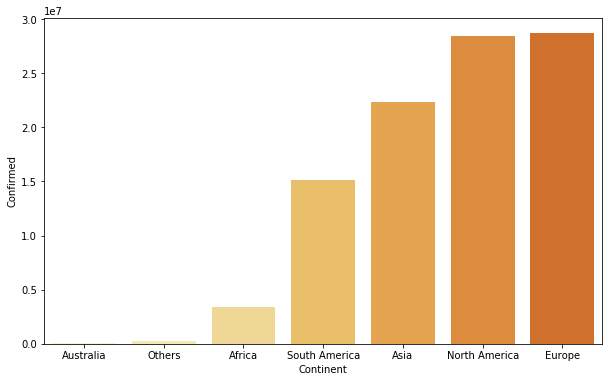

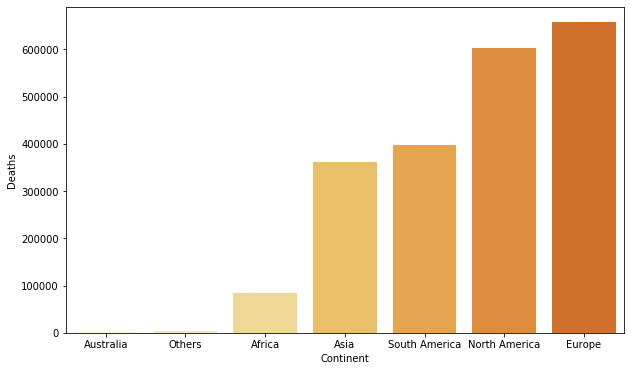

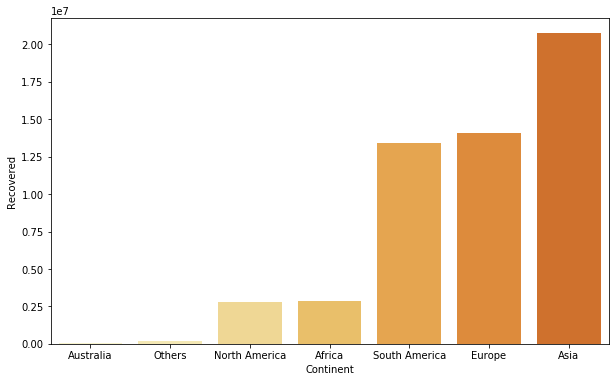

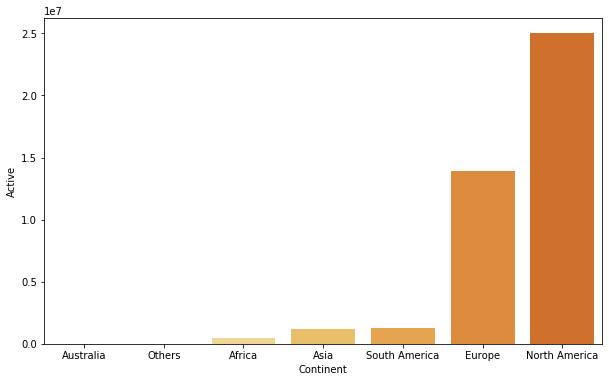

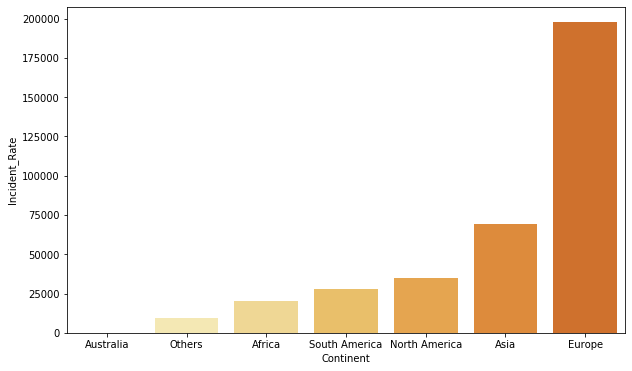

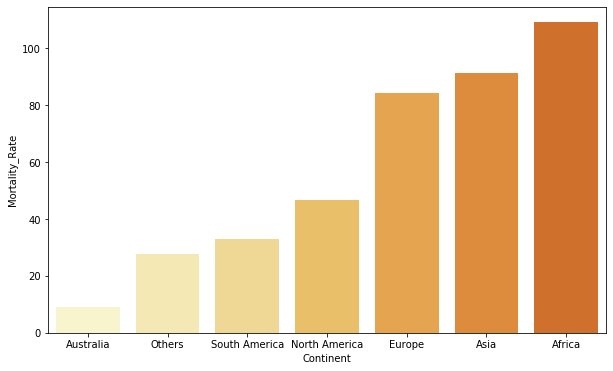

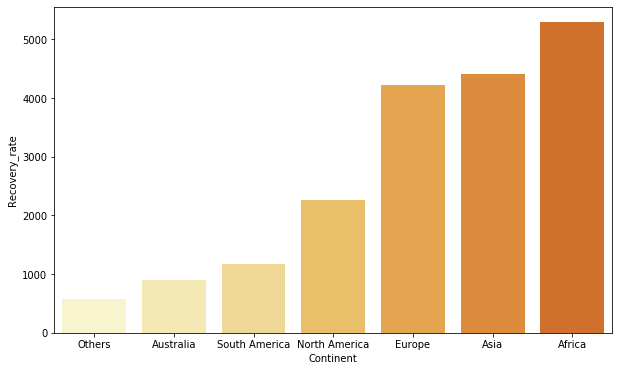

In [24]:
# Lets plot the graph
for feature in continent_features:
    data = continent_df.copy()
    ax, fig = plt.subplots(figsize=(10,6))
    feature_sorted = data.sort_values(feature)
    ax = sns.barplot(x=feature_sorted['Continent'], y=feature_sorted[feature], 
                     palette=sns.color_palette("YlOrBr", 10))
    plt.xlabel('Continent')
    plt.ylabel(feature)
    plt.show()

<p> From the barplot we can see Europe and North America seem to have the highest recorded confirmation and Death Rate. Asia seems to have the highest recovered rate. And Africa has the highest recovery rate </p>

In [25]:
# lets get the unique name of the continents
continent_name = list(df_covid19.Continent.unique())
# lets write a function that displays the continent

In [26]:
def country_continent_cases(data, continent):
    dataset = data.copy()
    country_data = dataset[(dataset['Continent'] == continent)].sort_values('Confirmed', ascending=False).\
    reset_index(drop=True).style.background_gradient(cmap='Reds').background_gradient(cmap='Blues')
    return country_data


In [27]:
country_continent_cases(df_covid19, 'Asia')

,Country,Last_Update,Continent,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,Recovery_rate
0,India,2021-01-23 07:22:06,Asia,1.06397e+07,153184,1.03008e+07,185662,770.989,1.43974,98.5603
1,Turkey,2021-01-23 07:22:06,Asia,2.41847e+06,24789,2.29605e+06,97633,2867.56,1.02499,98.975
2,Iran,2021-01-23 07:22:06,Asia,1.36085e+06,57225,1.15168e+06,151951,1620.2,4.20509,95.7949
3,Indonesia,2021-01-23 07:22:06,Asia,965283,27453,781147,156683,352.907,2.84404,97.156
4,Iraq,2021-01-23 07:22:06,Asia,612092,12984,578292,20816,1521.77,2.12125,97.8788
5,Israel,2021-01-23 07:22:06,Asia,589028,4266,504590,80172,6805.21,0.724244,99.2758
6,Bangladesh,2021-01-23 07:22:06,Asia,530890,7981,475561,47348,322.358,1.50332,98.4967
7,Pakistan,2021-01-23 07:22:06,Asia,530818,11247,484508,35063,240.306,2.11881,97.8812
8,Philippines,2021-01-23 07:22:06,Asia,509887,10136,467720,32031,465.306,1.98789,98.0121
9,Saudi Arabia,2021-01-23 07:22:06,Asia,365988,6346,357525,2117,1051.27,1.73394,98.2661


In [28]:
country_continent_cases(df_covid19, 'Europe') #change the continent name to get the cases in that specific continent   

,Country,Last_Update,Continent,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,Recovery_rate
0,Russia,2021-01-23 07:22:06,Europe,3.63786e+06,67376,3.04884e+06,521649,2492.81,1.85208,98.1479
1,United Kingdom,2021-01-23 07:22:06,Europe,3.59409e+06,96166,8678,3.48925e+06,5294.31,2.67567,97.3243
2,France,2021-01-23 07:22:06,Europe,3.0697e+06,72788,221937,2.77497e+06,4702.82,2.37118,97.6288
3,Spain,2021-01-23 07:22:06,Europe,2.49956e+06,55441,150376,2.29374e+06,5346.11,2.21803,97.782
4,Italy,2021-01-23 07:22:06,Europe,2.44185e+06,84674,1.85513e+06,502053,4038.67,3.46761,96.5324
5,Germany,2021-01-23 07:22:06,Europe,2.12526e+06,51713,1.81389e+06,259654,2536.6,2.43325,97.5667
6,Poland,2021-01-23 07:22:06,Europe,1.46445e+06,34908,1.21573e+06,213808,3869.43,2.3837,97.6163
7,Ukraine,2021-01-23 07:22:06,Europe,1.22739e+06,22814,974806,229767,2806.5,1.85875,98.1413
8,Netherlands,2021-01-23 07:22:06,Europe,951747,13528,12258,925961,5554.44,1.42139,98.5786
9,Czechia,2021-01-23 07:22:06,Europe,924847,15130,808263,101454,8636.18,1.63595,98.3641


In [29]:
country_continent_cases(df_covid19, 'Africa')

,Country,Last_Update,Continent,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,Recovery_rate
0,South Africa,2021-01-23 07:22:06,Africa,1.39257e+06,40076,1.20128e+06,151208,2348,2.87785,97.1222
1,Morocco,2021-01-23 07:22:06,Africa,464844,8105,440652,16087,1259.38,1.7436,98.2564
2,Tunisia,2021-01-23 07:22:06,Africa,193273,6092,140180,47001,1635.33,3.15202,96.848
3,Egypt,2021-01-23 07:22:06,Africa,160463,8853,125603,26007,156.803,5.51716,94.4828
4,Ethiopia,2021-01-23 07:22:06,Africa,132881,2060,118513,12308,115.585,1.55026,98.4497
5,Nigeria,2021-01-23 07:22:06,Africa,118138,1490,94130,22518,57.3097,1.26124,98.7388
6,Libya,2021-01-23 07:22:06,Africa,112540,1737,90952,19851,1637.83,1.54345,98.4565
7,Algeria,2021-01-23 07:22:06,Africa,105124,2856,71552,30716,239.73,2.71679,97.2832
8,Kenya,2021-01-23 07:22:06,Africa,99769,1740,82866,15163,185.543,1.74403,98.256
9,Ghana,2021-01-23 07:22:06,Africa,59480,361,56706,2413,191.421,0.606927,99.3931


# SOME STATISTICS

In [30]:
desc = df_covid19.iloc[:, 3:].describe()
desc

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,Recovery_rate
count,1.920000e+02,192.000000,1.920000e+02,1.920000e+02,192.000000,192.000000,192.000000
mean,5.113800e+05,10976.729167,2.819993e+05,2.184040e+05,1871.248704,2.090415,97.909585
std,2.100366e+06,38966.509460,1.002342e+06,1.794689e+06,2313.401351,2.788135,2.788135
min,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,71.010387
25%,5.294250e+03,80.000000,3.381500e+03,5.740000e+02,102.179830,0.934171,97.501026
50%,5.105500e+04,617.500000,2.516550e+04,5.415000e+03,823.912456,1.652133,98.347867
75%,2.296512e+05,4338.250000,1.511088e+05,2.832050e+04,3160.796163,2.498974,99.065829
max,2.482181e+07,414107.000000,1.030084e+07,2.440770e+07,12186.630428,28.989613,100.000000


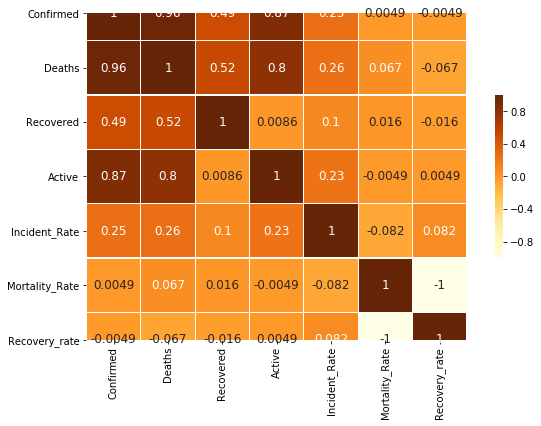

In [31]:
# lets get the correlation
corr = df_covid19.iloc[:, :].corr(method ='pearson')
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr, cmap="YlOrBr", vmax=1, square=True, linewidth=.2, 
               cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":12})
plt.show()

In [32]:
# LETS PERFORM SOME SPREAD ANALYSIS.
# WE WILL DISPLAY HOW THE COVID HAS SPREAD SO FAR

df_confirmed = df_confirmed.drop(columns = ['Province/State'])
df_death = df_death.drop(columns = ['Province/State'])

In [33]:
df_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,4,4,4,4,5,7,8,11,12,13,15,16,18,20,24,25,29,30,34,41,43,76,80,91,107,118,146,175,197,240,275,300,338,368,424,445,485,532,556,608,666,715,785,841,907,934,997,1027,1093,1177,1236,1331,1464,1532,1704,1830,1940,2127,2291,2470,2705,2895,3225,3393,3564,3781,4042,4403,4687,4968,5227,5640,6054,6403,6665,7073,7654,8146,8677,9219,10001,10585,11176,11834,12459,13039,13662,14528,15208,15753,16512,17270,18057,18972,19554,20345,20920,21462,22146,22894,23550,24106,24770,25531,26314,26878,27536,27882,28428,28837,29147,29471,29705,30165,30441,30606,30957,31228,31507,31826,32012,32314,32662,32941,33180,33374,33584,33898,34184,34356,34441,34595,34730,34984,35060,35219,35279,35453,35493,35605,35717,35918,35978,36026,36147,36253,36358,36463,36532,36665,36700,36701,36737,36773,36820,36928,37006,37046,37083,37153,37260,37336,37422,37497,37542,37590,37667,37710,37750,37852,37885,37944,37990,38045,38061,38103,38119,38130,38133,38155,38159,38193,3824

In [34]:
# lets rename some the country column
df_confirmed = df_confirmed.rename(columns={'Country/Region': 'Country'})
df_death = df_death.rename(columns={'Country/Region': 'Country'})

In [35]:
df_confirmed= df_confirmed.replace(to_replace = replace_name_row, value=new_names)
df_death= df_death.replace(to_replace = replace_name_row, value=new_names)

In [36]:
# lets also create a continent column
#df_confirmed = df_confirmed.drop(columns= 'Continent')
#df_death = df_death.drop(columns ='Continent')

In [37]:
# lets add the continents column
countries_attr = np.asarray(df_confirmed['Country'])
continent_attr= [continents[get_continent(country)] for country in countries_attr]

In [38]:
df_confirmed.insert(1, 'Continent', continent_attr)
df_death.insert(1, 'Continent', continent_attr)

# SPREAD ANALYSIS

In [39]:
# graphic function that displays the cummulative spread of COVID19
def visualize_cases_covid19(confirmed, death, x=None):
    fig, ax = plt.subplots(figsize=(10,7))
    plt.tight_layout()
    color = [ '#00FF00','#FF0000']
    
    stats = [confirmed, death]
    #This code adds all the columns to get the total confirmed cases for each date individually
    total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]), axis=0)
    #This code adds all the columns to get the total death cases for each date individually
    total_death = np.sum(np.asarray(stats[1].iloc[:,5:]), axis=0)
    
    mortality_rate = float(total_death[-1]/total_confirmed[-1] *100)
    plot_mortality = np.asarray((total_death/total_confirmed) * 100)
    label = ['Confirmed Cases', 'Death']
    
    if x==None:
        for i, stat in enumerate(stats): #stat gets the both arrays
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0) 
            #makes a range of number from 0 till the last number
            date = np.arange(1, cases.shape[0] + 1)
            ax = sns.lineplot(x=date, y=cases, label = label[i], palette=('YlOrBr'), color=color[i])
            #plt.plot(date, cases, label = label[i], color=color[i])   
            print('The total cases from ' + stats[0].columns[5] + ' to ' + stats[0].columns[-1] + '\n')
            print('The Total number of cases recorded is '+ str(total_confirmed[-1]) + '\n')
            print('The Total death recorded is '+ str( total_confirmed[-1]) + '\n')
            print('The mortality rate is '+ str(mortality_rate) + '\n')
            print('The total confirmed case for the last 5 days is '+ str(total_confirmed[-5]) + '\n')
            print('The total death for the last 5 days is '+ str(total_death[-5]))
            plt.xlabel('Occurance Days')
            plt.ylabel('Total Cases recorded')
            plt.title('COVID-19 Cases World wide')
            plt.legend()
    else:
        date = np.arange(1, len(plot_mortality) + 1)
        print('The mortality rate' +'\n')
        ax = sns.lineplot(x=date, y=plot_mortality, palette=('YlOrBr'), color= 'red')
        plt.xlabel('Days')
        plt.ylabel('Frequency of death')
        plt.title('Global Mortality Rate')
    

    plt.show()
    

The total cases from 1/23/20 to 1/22/21

The Total number of cases recorded is 98174074

The Total death recorded is 98174074

The mortality rate is 2.146474027348605

The total confirmed case for the last 5 days is 95559647

The total death for the last 5 days is 2040107
The total cases from 1/23/20 to 1/22/21

The Total number of cases recorded is 98174074

The Total death recorded is 98174074

The mortality rate is 2.146474027348605

The total confirmed case for the last 5 days is 95559647

The total death for the last 5 days is 2040107


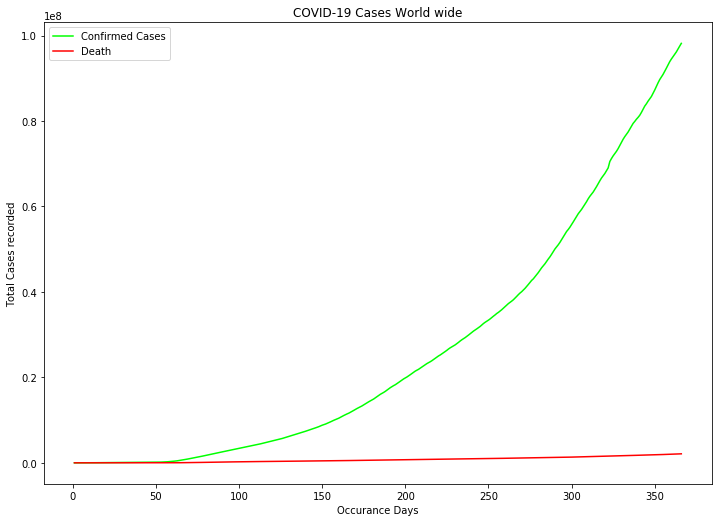

In [40]:
visualize_cases_covid19(df_confirmed, df_death)

The mortality rate



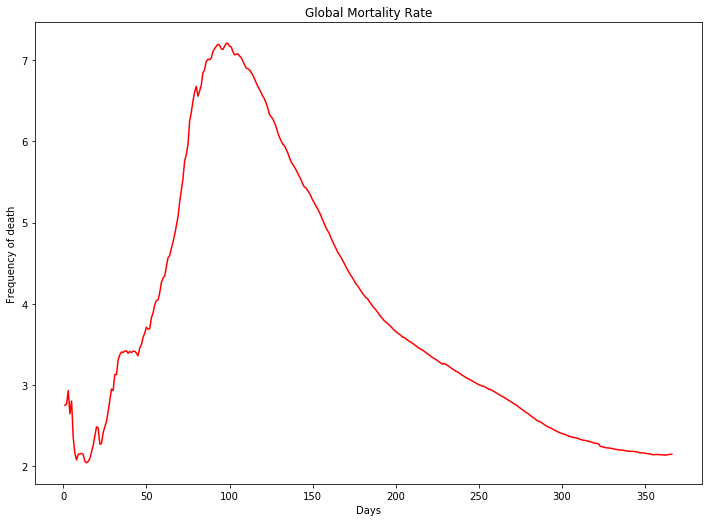

In [41]:
visualize_cases_covid19(df_confirmed, df_death, x=1) 

In [42]:
# lets visualize the spread rate for each continent
# we will group the countries by continent  groupby('Continent').sum(axis=1).


In [43]:
# lets visualize the spread rate for each continent
# lets create a function for it
def continent_spread(data, x=None, country=None):
    continent = data.copy()
    # get the name of the continent
    name_of_continent = np.array(continent['Continent'].unique())
    # group the data
    if x == None:
        continent.drop(columns=['Country', 'Lat', 'Long'], axis=1, inplace=True)
        continent = continent.groupby('Continent').sum().reset_index()
        # copy the new df
        continent_copied = continent.copy()
        # transpose the dataframe
        # transposing the df directly causes a new column to be created so we
        # transpose by renaming the axis
        continent_copied = continent_copied.T.set_axis(name_of_continent, axis=1, inplace=False)\
        .rename_axis('Days',axis=0).reset_index()
        # removing the 1st three rows
        continent_copied.drop(continent_copied.index[:3], inplace=True)
        continent_copied.reset_index(drop=True, inplace=True)
    # converting the columns to numeric
        for name in name_of_continent:
            continent_copied[name]=continent_copied[name].apply(pd.to_numeric)
        # plotting the graph

        continent_copied.plot(x='Days', colors=['r', 'g', 'b', 'orange','cyan','pink','magenta'], figsize=(10,6));
    else:
        continent.drop(columns=['Continent', 'Lat', 'Long'], axis=1, inplace=True)
        
        spread_df = continent.loc[continent['Country'] == country]
        spread = spread_df.T.set_axis([country], axis = 1, inplace=False).rename_axis('Days',axis=0).reset_index()
        #removing the 1st three rows
        spread.drop(spread.index[0:3], inplace=True)
        spread.reset_index(drop=True, inplace=True)
        # convert to numeric
        spread[country] = spread[country].apply(pd.to_numeric)
        print('{} spread rate'.format(country))
        spread.plot(x='Days', colors='g', figsize=(10,6))
        

/Users/kingmichael/Desktop/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


The graph displays the spread rate of the virus between continents  



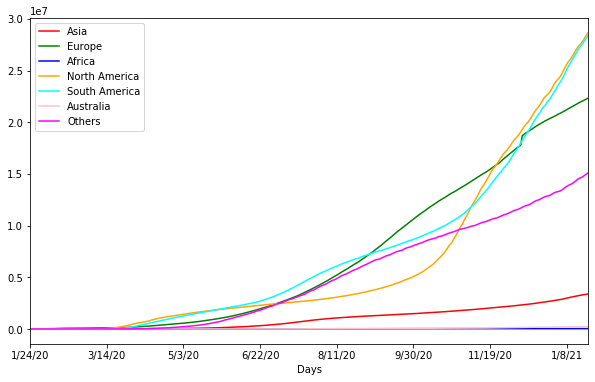

In [44]:
continent_spread(df_confirmed)
print('The graph displays the spread rate of the virus between continents ', '\n')

The graph displays the death rate of the virus between continents  



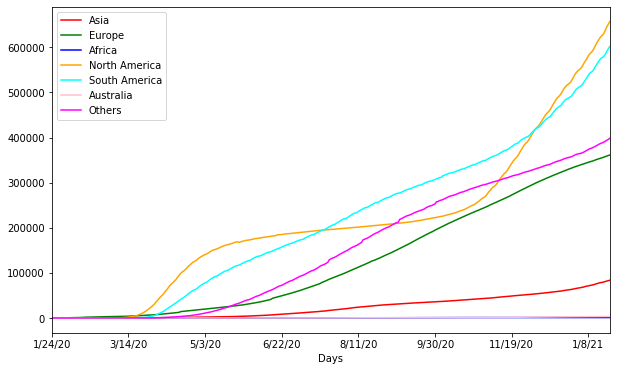

In [45]:
continent_spread(df_death)
print('The graph displays the death rate of the virus between continents ', '\n')

In [46]:
#iqr = stats.iqr(df_covid19['Confirmed'])

# NIGERIA DATA COLLECTION

In [47]:
# Grab the html page
webpage_link = requests.get('https://covid19.ncdc.gov.ng')

In [48]:
# CONVERTING THE WEBPAGE INTO BEAUTIFUL SOUP
webpage_soup = Soup(webpage_link.content, 'html.parser')

In [49]:
#getting the attribute
webpage_attribute = webpage_soup.find_all(attrs={'id':'custom1'})

In [50]:
#getting the headers
header = webpage_soup.find_all('thead')
headers =[]
for i in header:
    container=i.find('tr')
    for contents in container.children:
        headers.append(contents.string.strip())

#removing spaces
headers[:] = [x for x in headers if x]
headers

['States Affected',
 'No. of Cases (Lab Confirmed)',
 'No. of Cases (on admission)',
 'No. Discharged',
 'No. of Deaths']

In [51]:
t_state = webpage_soup.select('tbody tr td:first-child')
t_confirmed = webpage_soup.select('tbody tr td:nth-child(2)')
t_active = webpage_soup.select('tbody tr td:nth-child(3)')
t_dischared = webpage_soup.select('tbody tr td:nth-child(4)')
t_deaths = webpage_soup.select('tbody tr td:nth-child(5)')
states = []
confirmed = []
active = []
discharge=[]
deaths = []

#FUNCTION TO SCRAPE THE COLUMNS FROM THE WEBSITE AND PUT THEM IN ARRAYS
def all_elements(elements):
    if elements == t_state:
        for target in elements:
            containers = target.get_text()
            states.append(containers.strip())
    elif elements == t_confirmed:
        for target in elements:
            containers = target.get_text()
            confirmed.append(containers.strip())
    elif elements == t_active:
        for target in elements:
            containers = target.get_text()
            active.append(containers.strip())
    elif elements == t_dischared:
        for target in elements:
            containers = target.get_text()
            discharge.append(containers.strip())
    elif elements == t_deaths:
        for target in elements:
            containers = target.get_text()
            deaths.append(containers.strip())

        
all_elements(t_state) 

In [52]:
all_elements(t_confirmed) 
print(confirmed)

['43,251', '15,506', '7,251', '7,176', '4,956', '4,745', '3,461', '3,106', '2,730', '2,221', '2,167', '1,754', '1,723', '1,644', '1,567', '1,490', '1,348', '1,302', '1,162', '1,120', '917', '874', '725', '694', '689', '655', '634', '608', '589', '495', '441', '296', '267', '211', '179', '179', '5']


In [53]:
all_elements(t_active) 
print(active)

['8,511', '4,470', '697', '1,110', '794', '789', '432', '477', '325', '432', '121', '293', '52', '248', '188', '1,152', '267', '200', '81', '40', '124', '64', '257', '163', '98', '81', '280', '344', '162', '61', '42', '71', '51', '6', '1', '14', '0']


In [54]:
all_elements(t_dischared) 
print(discharge)

['34,457', '10,917', '6,502', '6,010', '4,090', '3,879', '2,896', '2,590', '2,332', '1,737', '2,000', '1,424', '1,644', '1,375', '1,337', '325', '1,054', '1,072', '1,069', '1,063', '776', '774', '458', '513', '565', '550', '334', '238', '413', '426', '388', '213', '203', '197', '166', '160', '3']


In [55]:
all_elements(t_deaths)
print(deaths)

['283', '119', '52', '56', '72', '77', '133', '39', '73', '52', '46', '37', '27', '21', '42', '13', '27', '30', '12', '17', '17', '36', '10', '18', '26', '24', '20', '26', '14', '8', '11', '12', '13', '8', '12', '5', '2']


# CREATE FILES TO PANDAS AND SAVE IT AS A CSV

In [56]:
df_nigeria = pd.DataFrame(columns=headers)

In [57]:
df_nigeria['States Affected'] = states
df_nigeria['No. of Cases (Lab Confirmed)'] = confirmed
df_nigeria['No. of Cases (on admission)'] = active
df_nigeria['No. Discharged'] = discharge
df_nigeria['No. of Deaths'] = deaths
#LOADING THE HEAD
df_nigeria.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"43,251","8,511","34,457",283
1,FCT,"15,506","4,470","10,917",119
2,Plateau,"7,251",697,"6,502",52
3,Kaduna,"7,176","1,110","6,010",56
4,Oyo,"4,956",794,"4,090",72


In [58]:
#Converting to numeric
for columns in df_nigeria.columns:
    if 'No. of Cases (Lab Confirmed)' in columns:
        df_nigeria[columns]=df_nigeria[columns].replace('\W','',regex=True)
        df_nigeria[columns]=pd.to_numeric(df_nigeria[columns])
    elif 'No. of Cases (on admission)' in columns:
        df_nigeria[columns]=df_nigeria[columns].replace('\W','',regex=True)
        df_nigeria[columns]=pd.to_numeric(df_nigeria[columns])
    elif 'No. Discharged' in columns:
        df_nigeria[columns]=df_nigeria[columns].replace('\W','',regex=True)
        df_nigeria[columns]=pd.to_numeric(df_nigeria[columns])
    elif 'No. of Deaths' in columns:
        df_nigeria[columns]=df_nigeria[columns].replace('\W','',regex=True)
        df_nigeria[columns]=pd.to_numeric(df_nigeria[columns])

In [59]:
df_nigeria.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)     int64
No. of Cases (on admission)      int64
No. Discharged                   int64
No. of Deaths                    int64
dtype: object

In [60]:
# save file
df_nigeria.to_csv('nigeria_covid19.csv', index=False)

In [61]:
df_nigeria = pd.read_csv('nigeria_covid19.csv')

In [62]:
df_nigeria = df_nigeria.rename(columns={'States Affected':'States',
                                        'No. of Cases (Lab Confirmed)' :'Confirmed', 
                                        'No. of Cases (on admission)': 'Active',
                                       'No. Discharged': 'Recovered',
                                       'No. of Deaths': 'Deaths'})
df_nigeria.head()

,States,Confirmed,Active,Recovered,Deaths
0,Lagos,43251,8511,34457,283
1,FCT,15506,4470,10917,119
2,Plateau,7251,697,6502,52
3,Kaduna,7176,1110,6010,56
4,Oyo,4956,794,4090,72


In [63]:
# Check for null
df_nigeria.isnull().sum()

States       0
Confirmed    0
Active       0
Recovered    0
Deaths       0
dtype: int64

In [64]:
df_nigeria['mortality_rate'] = (df_nigeria['Deaths'] / df_nigeria['Confirmed']) *100

In [65]:
total_confirmed_case = df_nigeria['Confirmed'].sum()
total_death= df_nigeria['Deaths'].sum()

In [66]:
print('The total confirmed case as Jan 23rd, 2021 is {}'.format(total_confirmed_case))

The total confirmed case as Jan 23rd, 2021 is 118138


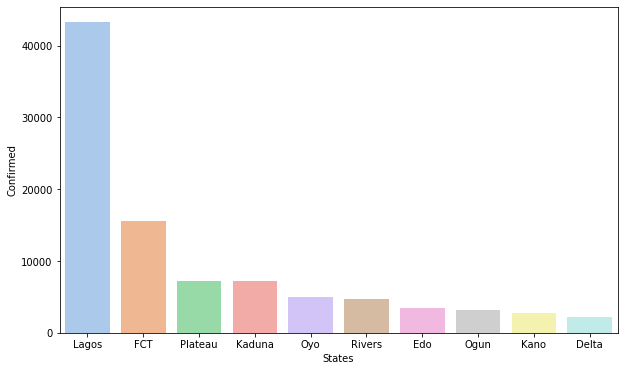

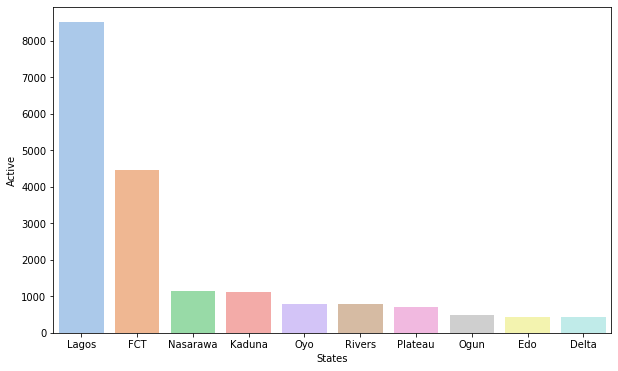

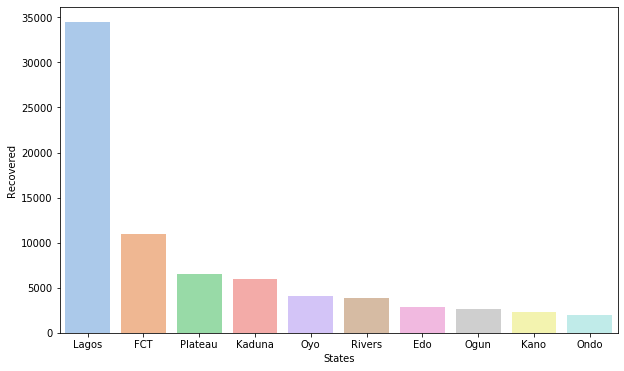

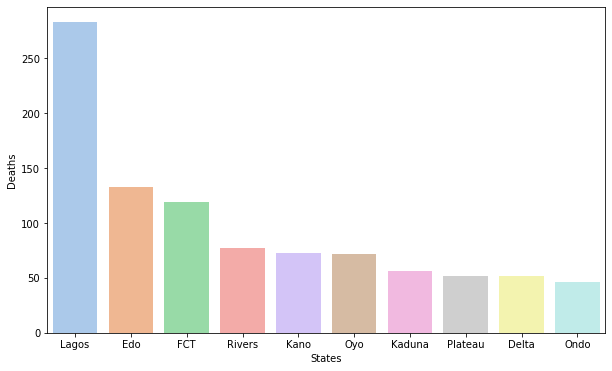

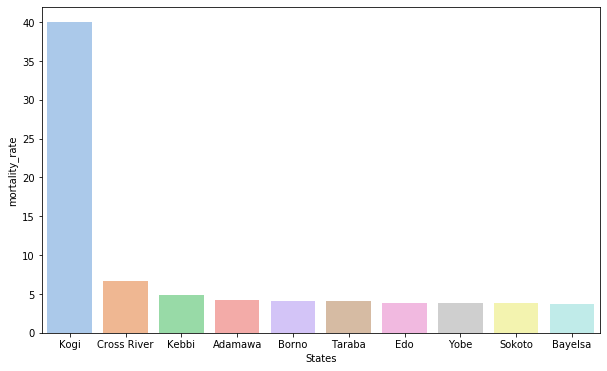

In [67]:
#showing the graph of the whole cases
features = [features for features in df_nigeria.columns if df_nigeria[features].dtypes !='O']

for feature in features:
    data = df_nigeria.copy()
    ax, fig = plt.subplots(figsize=(10,6))
    feature_sorted = data.sort_values(feature, ascending=False)[:10]
    ax = sns.barplot(x=feature_sorted['States'], y=feature_sorted[feature], 
                     palette=sns.color_palette("pastel", 10))
    plt.xlabel('States')
    plt.ylabel(feature)
    plt.show()
    

Nigeria spread rate
We observe a steady increase in the case


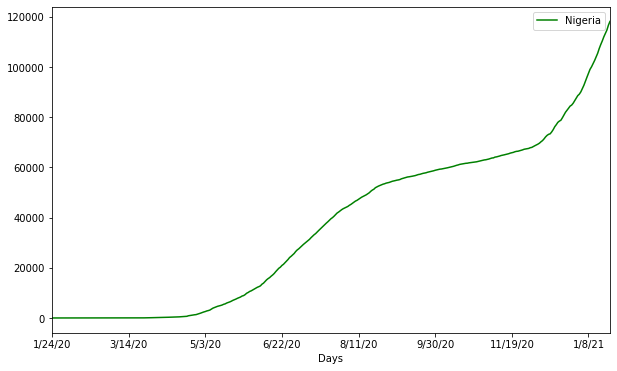

In [68]:
# Lets see the spread analysis
# The logic statement has been written in the function above
# We call the function
# For your country analysis you can pass in your country's name in the country argument
continent_spread(df_confirmed, country='Nigeria', x=0)
print('We observe a steady increase in the case')

Nigeria spread rate
The death rate


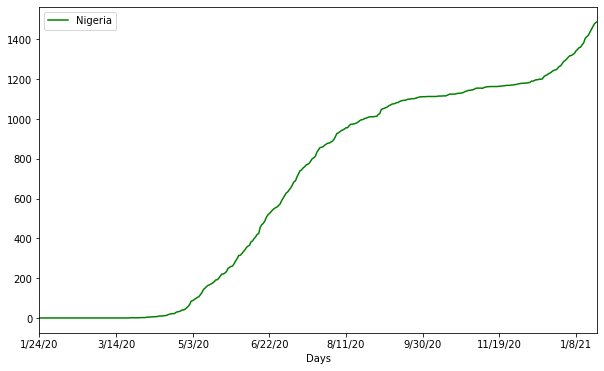

In [69]:
# the death rate
continent_spread(df_death, country='Nigeria', x=0)
print('The death rate')

# SOME STATICTICS

In [70]:
df_nigeria.describe()

,Confirmed,Active,Recovered,Deaths,mortality_rate
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,3192.918919,608.054054,2544.594595,40.270270,3.435381
std,7357.192589,1531.398053,5823.338397,50.651669,6.323574
min,5.000000,0.000000,3.000000,2.000000,0.654320
25%,608.000000,64.000000,388.000000,13.000000,1.452785
50%,1162.000000,188.000000,1054.000000,26.000000,2.304147
75%,2221.000000,432.000000,2000.000000,46.000000,3.664122
max,43251.000000,8511.000000,34457.000000,283.000000,40.000000


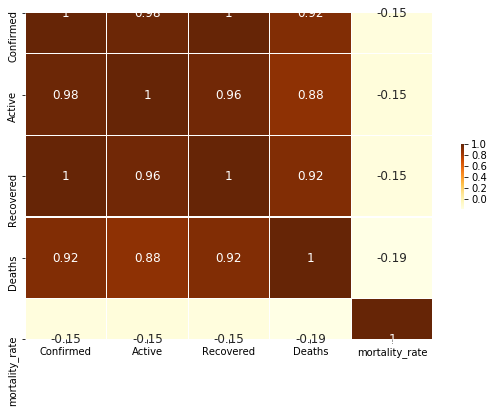

In [71]:
corr = df_nigeria.corr()
ax, fig = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr, cmap="YlOrBr", vmax=1, square=True, linewidth=.1, 
               cbar_kws={"shrink": .2}, annot=True, annot_kws={"fontsize":12})
plt.show()